In [1]:
# Import required modules
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))


from database.sleep_queries import get_recent_sleep_data, SleepDataExtractor, get_sleep_data_by_date_range
from visualization.sleep_chart import create_sleep_chart
from visualization.sleep_utils import calculate_sleep_metrics


In [6]:
# Load recent sleep data from database
sleep_data = get_recent_sleep_data(days=45)

print(f"Found {len(sleep_data)} days of sleep data:")
for data in sleep_data:
    print(f"  {data['day']}: {data['bedtime']} - {data['wake_time']}")

# Show full dates too
print("\nFull dates:")
for data in sleep_data:
    print(f"  {data['full_date']}: {data['bedtime']} - {data['wake_time']}")


Found 45 days of sleep data:
  04/19: 01:20 - 08:25
  04/20: 01:15 - 10:39
  04/21: 02:30 - 10:09
  04/22: 01:07 - 10:08
  04/23: 02:19 - 08:31
  04/24: 01:05 - 10:17
  04/25: 00:54 - 08:35
  04/26: 04:58 - 09:34
  04/27: 01:23 - 10:27
  04/28: 01:18 - 10:18
  04/29: 01:00 - 09:16
  04/30: 00:35 - 08:24
  05/01: 00:54 - 11:41
  05/02: 00:41 - 07:56
  05/03: 00:39 - 10:22
  05/04: 01:00 - 08:46
  05/06: 01:08 - 10:25
  05/07: 01:17 - 09:59
  05/08: 01:46 - 09:34
  05/10: 03:09 - 10:35
  05/11: 00:06 - 11:22
  05/12: 01:46 - 11:03
  05/13: 00:47 - 09:47
  05/14: 02:32 - 10:08
  05/15: 02:43 - 10:44
  05/16: 05:16 - 10:20
  05/17: 02:45 - 08:52
  05/18: 03:21 - 09:15
  05/19: 02:08 - 09:58
  05/20: 02:43 - 11:13
  05/21: 02:15 - 10:44
  05/22: 01:09 - 09:44
  05/23: 01:47 - 10:45
  05/24: 23:57 - 10:38
  05/25: 00:46 - 10:54
  05/26: 00:55 - 10:21
  05/27: 00:32 - 10:51
  05/28: 00:17 - 09:39
  05/29: 01:39 - 10:47
  05/30: 00:31 - 12:04
  05/31: 01:17 - 11:32
  06/01: 01:18 - 11:24
  06/

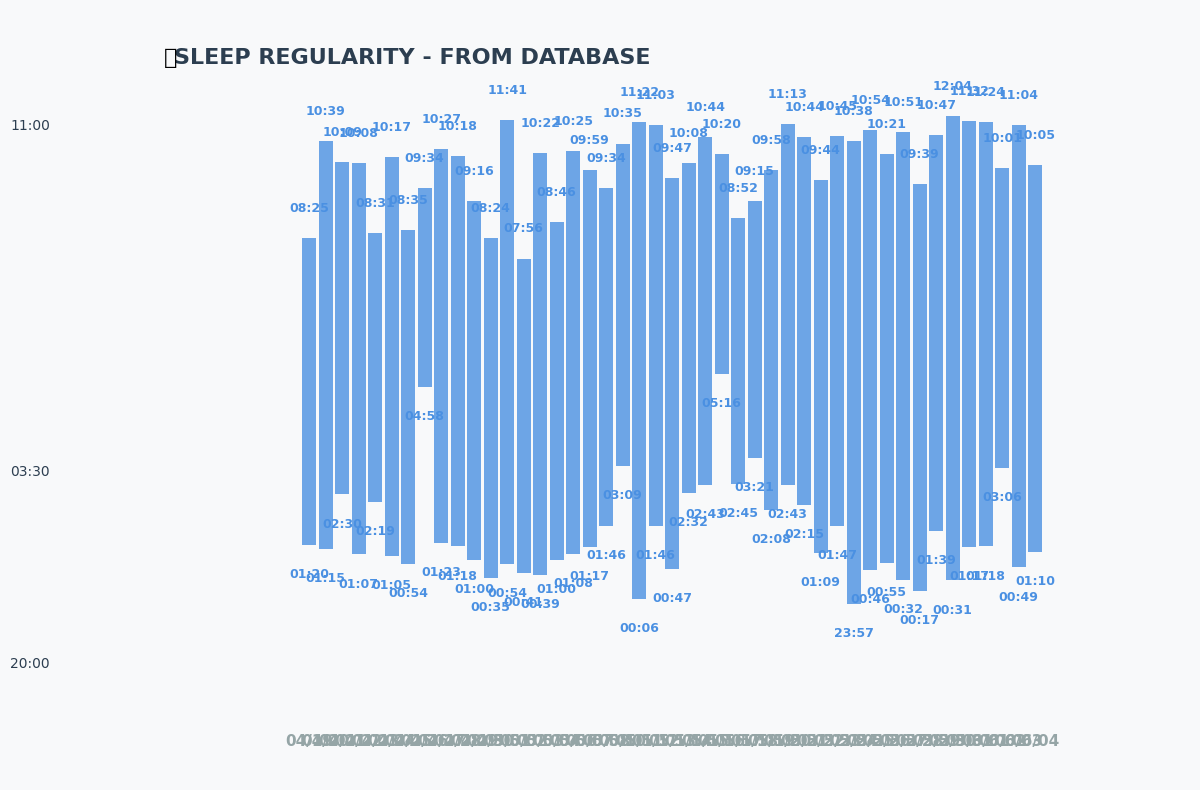

Sleep Metrics:
  Average Duration: 8.6 hours
  Sleep Consistency: 55.4%
  Average Bedtime: 2.1 hours
  Average Wake Time: 10.2 hours


In [7]:
# Create sleep chart with real dates
chart = create_sleep_chart(
    sleep_data=sleep_data,
    title="SLEEP REGULARITY - FROM DATABASE",
    figsize=(12, 8)
)

# Display the chart
chart.show()

# Calculate and show sleep metrics
metrics = calculate_sleep_metrics(sleep_data)
print("Sleep Metrics:")
print(f"  Average Duration: {metrics['avg_duration']:.1f} hours")
print(f"  Sleep Consistency: {metrics['sleep_consistency']:.1f}%")
print(f"  Average Bedtime: {metrics['avg_bedtime']:.1f} hours")
print(f"  Average Wake Time: {metrics['avg_wake_time']:.1f} hours")
